# code for moment of velocities
Briquet and Aerts
https://www.aanda.org/articles/aa/pdf/2003/05/aa3122.pdf

In [25]:
import numpy as np
import matplotlib.pyplot as plt

array([1.        , 0.9996872 , 0.99874901, ..., 0.95063903, 0.95810222,
       0.96496603])

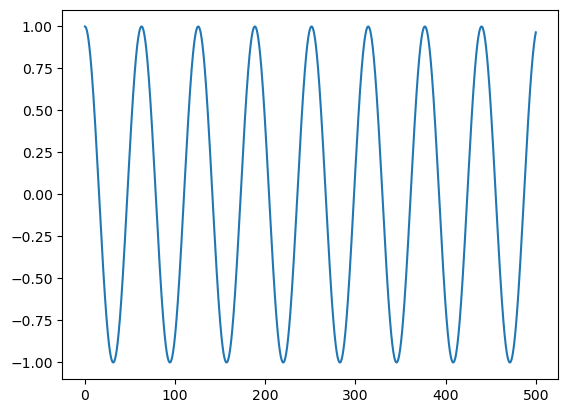

In [34]:
def avg_v_one_mode(t, omega, psi, A, B, sigma, vrot):
    """<v> for one mode"""
    return A*np.cos(omega*t + psi)
t= np.linspace(0,500,2000)
omega = .1
psi=0
A = 1

plt.plot(t, avg_v_one_mode(t, omega, psi, A, np.nan, 1, 1))
avg_v_one_mode(t, omega, psi, A, np.nan, 1, 1)

array([1.        , 0.9996872 , 0.99874901, ..., 0.95063903, 0.95810222,
       0.96496603])

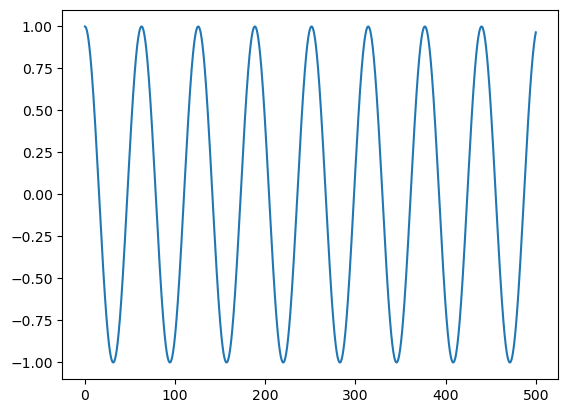

In [42]:
def avg_v_multi_mode(t, omega, psi, A, B, sigma, vrot):
    """<v> for multiple modes"""
    answer=0
    for i in range(len(A)):
        answer = A[i]*np.cos(omega[i]*t + psi[i])
    return answer

plt.plot(t, avg_v_multi_mode(t, [omega], [psi], [A], np.nan, 1, 1))
avg_v_multi_mode(t, [omega], [psi], [A], np.nan, 1, 1)

array([3.        , 3.0500198 , 3.1000083 , ..., 2.37940214, 2.42714703,
       2.47525029])

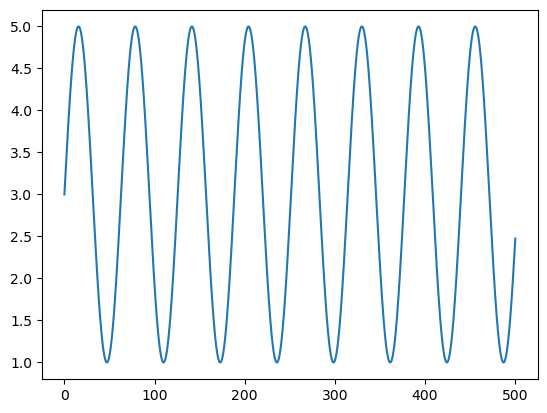

In [37]:
def avg_v2_one_mode(t, omega, psi, A, B, sigma, vrot):
    """<v^2> for one mode"""
    C = .5*(A**2-B**2)
    term1 = C*np.cos(2*omega*t+2*psi)
    
    D = 2*vrot*B
    term2 = D*np.sin(omega*t + psi)

    # double summations are 0
    E12 = .5*(A**2+B**2)
    Erot = vrot**2
    term5 = E12+Erot+sigma
    
    return term1+term2+term5
B=1
plt.plot(t, avg_v2_one_mode(t, omega, psi, A, B, 1, 1))
avg_v2_one_mode(t, omega, psi, A, B, 1, 1)

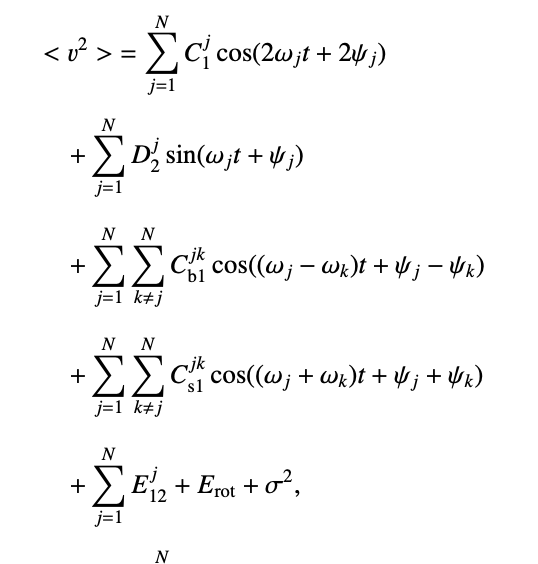

array([3.        , 3.0500198 , 3.1000083 , ..., 2.37940214, 2.42714703,
       2.47525029])

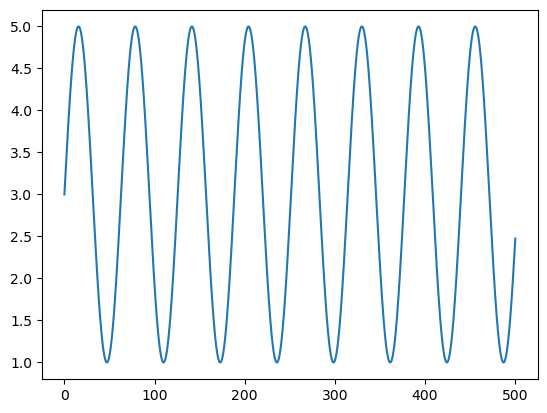

In [38]:
def avg_v2_multi_mode(t, omega, psi, A, B, sigma, vrot):
    """<v^2> for multiple modes"""
    # constants
    N=len(A)
    Erot = vrot**2
    
    # start off summation with terms 0
    total_term1 = 0
    total_term2 = 0
    total_term3 = 0
    total_term4 = 0
    total_term5 = 0
        

    for j in range(N):
        C = .5*(A[j]**2-B[j]**2)
        term1 = C*np.cos(2*omega[j]*t+2*psi[j])
        total_term1+=term1
        
        D = 2*vrot*B[j]
        term2 = D*np.sin(omega[j]*t + psi[j])
        total_term2+=term2
        
        # calculate the inner summations
        for k in range(N):
            if k != j:
                Cb1 = .5*(A[j]*A[k] + B[j]*B[k])
                term3 = Cb1*np.cos((omega[j] - omega[k])*t + psi[j] - psi[k])
                total_term3+=term3
                # term 4 has sum over same bounds
                Cs1 = .5*(A[j]*A[k] - B[j]*B[k])
                term4 = Cs1*np.cos((omega[j] + omega[k])*t + psi[j] + psi[k])
                total_term4+=term4
        
        
        E12 = .5*(A[j]**2+B[j]**2)
        term5 = E12+Erot+sigma
        total_term5+=term5
    total = total_term1+total_term2+total_term3+total_term4+total_term5
    return total
plt.plot(t, avg_v2_multi_mode(t, [omega], [psi], [A], [B], 1, 1))
avg_v2_multi_mode(t, [omega], [psi], [A], [B], 1, 1)

array([7.25      , 7.39899528, 7.54557447, ..., 5.30530471, 5.45689166,
       5.60976439])

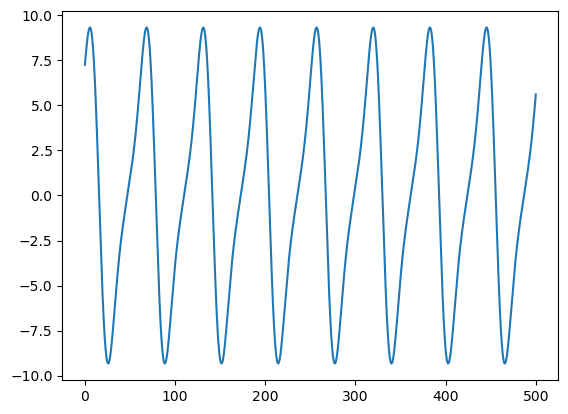

In [39]:
def avg_v3_one_mode(t, omega, psi, A, B, sigma, vrot):
    """<v^3> for one mode"""
    F = .25*(A**3 - 3*A*B**2)
    term1 = F*np.cos(3*omega*t+3*psi)
    
    G = 3*vrot*A*B
    term2 = G*np.sin(2*omega*t + 2*psi)
    
    RST = 3*(vrot**2+sigma**2)*A+.75*(A**3)+A*B**2
    term3 = RST*np.cos(omega*t+psi)

    # I think all other terms are 0
    return term1+term2+term3
plt.plot(t, avg_v3_one_mode(t, omega, psi, A, B, 1, 1))
avg_v3_one_mode(t, omega, psi, A, B, 1, 1)

array([7.25      , 7.39899528, 7.54557447, ..., 5.30530471, 5.45689166,
       5.60976439])

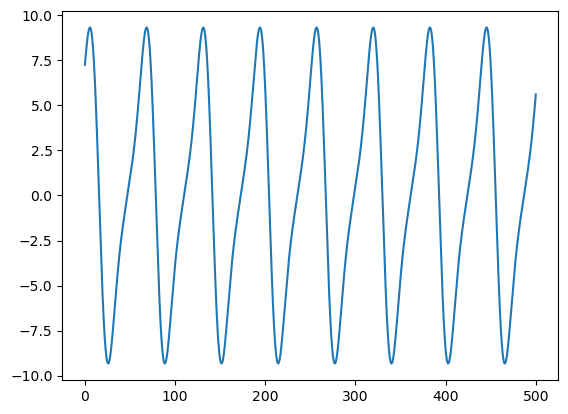

In [40]:
def avg_v3_multi_mode(t, omega, psi, A, B, sigma, vrot):
    """<v^3> for multiple modes"""
    # constants
    N=len(A)
    
    # start off summation with terms 0
    total_term1 = 0
    total_term2 = 0
    total_term3 = 0
    total_term4 = 0
    total_term5 = 0
    total_term6 = 0
    total_term7 = 0
    total_term8 = 0
    total_term9 = 0

    for j in range(N):
        # term 1
        F = .25*(A[j]**3 - 3*A[j]*B[j]**2)
        term1 = F*np.cos(3*omega[j]*t + 3*psi[j])
        total_term1+=term1

        # term 2
        G = 3*vrot*A[j]*B[j]
        term2 = G*np.sin(2*omega[j]*t + 2*psi[j])
        total_term2+=term2

        # term 3
        RST = 3*(vrot**2+sigma**2)*A[j]+.75*(A[j]**3)+A[j]*B[j]**2
        term3 = RST*np.cos(omega[j]*t + psi[j])
        total_term3+=term3
        
        # calculate the inner summations
        for k in range(N):
            for n in range(N):
                if k != j:
                    # term 4
                    Gb2 = -3*vrot*A[j]*B[k]
                    term4 = Gb2*np.sin((omega[j] - omega[k])*t + psi[j] - psi[k])
                    total_term4+=term4

                    # term 5
                    Gs2 = 3*vrot*A[j]*B[k]
                    term5 = Gs2*np.sin((omega[j] + omega[k])*t + psi[j] + psi[k])
                    total_term5+=term5

                    # or terms
                    # term 6
                    F11 = -.75*B[j]*A[k]*B[n] + .25*A[j]*A[k]*A[n]
                    term6 = F11*np.cos((omega[j] + omega[k] + omega[n])*t + psi[j] + psi[k] + psi[n])
                    total_term6+=term6
                    
                    # term 7
                    F21 = .75*B[j]*A[k]*B[n] + .25*A[j]*A[k]*A[n]
                    term7 = F21*np.cos((-omega[j] + omega[k] + omega[n])*t - psi[j] + psi[k] + psi[n])
                    total_term7+=term7
                    
                    # it seems like f31=f11 and f41 = f21?
                    # term 8 
                    F31 = F11
                    term7 = F31*np.cos((omega[j] - omega[k] + omega[n])*t + psi[j] - psi[k] + psi[n])
                    total_term8+=term8
                    
                    F41 = F21
                    term7 = F41*np.cos((omega[j] + omega[k] - omega[n])*t + psi[j] + psi[k] - psi[n])
                    total_term8+=term8
                    
                # check the or condition in summations, else if?
                elif n != j:
                    # term 6 again
                    F11 = -.75*B[j]*A[k]*B[n] + .25*A[j]*A[k]*A[n]
                    term6 = F11*np.cos((omega[j] + omega[k] + omega[n])*t + psi[j] + psi[k] + psi[n])
                    total_term6+=term6
                    
                    # term 7 again
                    F21 = .75*B[j]*A[k]*B[n] + .25*A[j]*A[k]*A[n]
                    term7 = F21*np.cos((-omega[j] + omega[k] + omega[n])*t - psi[j] + psi[k] + psi[n])
                    total_term7+=term7
                    
                    # it seems like f31=f11 and f41 = f21?
                    # term 8 again
                    F31 = F11
                    term7 = F31*np.cos((omega[j] - omega[k] + omega[n])*t + psi[j] - psi[k] + psi[n])
                    total_term8+=term8
                    
                    # term 9 again
                    F41 = F21
                    term7 = F41*np.cos((omega[j] + omega[k] - omega[n])*t + psi[j] + psi[k] - psi[n])
                    total_term9+=term9
                    
    total = total_term1+total_term2+total_term3+total_term4+total_term5+total_term6+total_term7+total_term8+total_term9
    return total
plt.plot(t, avg_v3_multi_mode(t, [omega], [psi], [A], [B], 1, 1))
avg_v3_multi_mode(t, [omega], [psi], [A], [B], 1, 1)